<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/Intelligent_Size_Matching_Recommender_System_Fuzzy_Logic_Approach_in_Children_Clothing_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip insTall scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4dd32fee5eb79b69436ec4fa1167e25428c8d54bea8c5f0149aac0437712aa6f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl





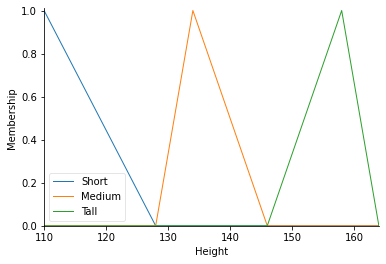

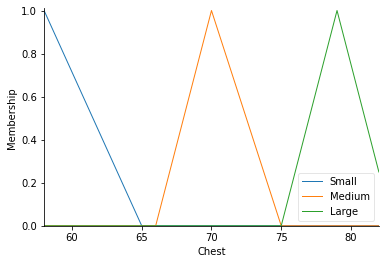

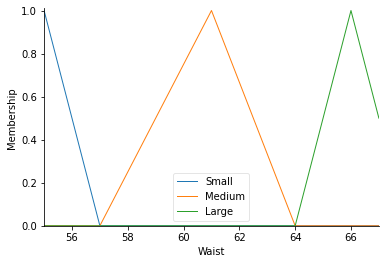

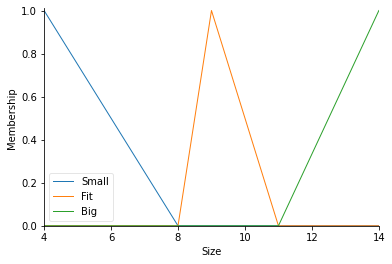

In [29]:
Height = ctrl.Antecedent(np.arange(110, 165, 1), 'Height')
Chest = ctrl.Antecedent(np.arange(58, 83, 1), 'Chest')
Waist = ctrl.Antecedent(np.arange(55, 68, 1), 'Waist')
Size = ctrl.Consequent(np.arange(4, 15 , 1), 'Size')


Height['Short'] = fuzz.trimf(Height.universe, [110, 110, 128])
Height['Medium'] = fuzz.trimf(Height.universe, [128, 134, 146])
Height['Tall'] = fuzz.trimf(Height.universe, [146, 158,164])


Chest['Small'] = fuzz.trimf(Chest.universe, [58, 58, 65])
Chest['Medium'] = fuzz.trimf(Chest.universe, [66, 70, 75])
Chest['Large'] = fuzz.trimf(Chest.universe, [75, 79, 83])


Waist['Small'] = fuzz.trimf(Waist.universe, [55, 55, 57])
Waist['Medium'] = fuzz.trimf(Waist.universe, [57, 61, 64])
Waist['Large'] = fuzz.trimf(Waist.universe, [64, 66, 68])


Size['Small'] = fuzz.trimf(Size.universe, [4, 4, 8])
Size['Fit'] = fuzz.trimf(Size.universe, [8, 9, 11])
Size['Big'] = fuzz.trimf(Size.universe, [11, 14, 14])

Height.view()
Chest.view()
Waist.view()
Size.view()

In [32]:
rule1 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule2 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Medium'], Size['Small'])
rule3 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Small'], Size['Small'])
rule4 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Medium'], Size['Small'])
rule5 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Large'], Size['Fit'])
rule6 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule7 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Medium'], Size['Fit'])
rule8 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule9 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Large'], Size['Fit'])
rule10 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule11 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Medium'], Size['Fit'])
rule12 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule13 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Small'], Size['Fit'])
rule14 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Medium'], Size['Fit'])
rule15 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Large'], Size['Big'])
rule16 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule17 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Medium'], Size['Big'])
rule18 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Large'], Size['Big'])
rule19 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule20 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Medium'], Size['Small'])
rule21 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule22 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Small'], Size['Fit'])
rule23 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Medium'], Size['Fit'])
rule24 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Large'], Size['Big'])
rule25 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule26 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Medium'], Size['Big'])
rule27 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Large'], Size['Big'])


9.35


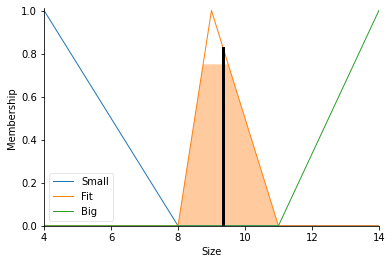

In [34]:
Sizing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
Sizing= ctrl.ControlSystemSimulation(Sizing_ctrl)
Sizing.input['Height'] = 158
Sizing.input['Chest'] = 70
Sizing.input['Waist'] = 60

Sizing.compute()
print(Sizing.output['Size'])
Size.view(sim=Sizing)